# Final Project Analysis




In [1]:
### Run this cell before continuing. 
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

<font size="6"> Introduction </font> 

Data Description: Provide a full descriptive summary of the dataset, including information such as summary statistics, any issues you see in the data, any other potential issues related to things you cannot directly see, how the data were collected, etc. 


The dataset explores a Minecraft server dataset from the Pacific Laboratory for Artificial Intelligence (a UBC research group) led by Frank Woods. Through recording play sessions from a controlled server, they collected data regarding the players' demographics and monitored their online and offline logs. This project was done to train generative AI to respond and act like an actual player in Minecraft. 

This report analyzes data from the `players.csv` file.

It will try to answer the question: What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types? In other words, can age, played hours, and player experience predict subscription in the `players.csv` dataset?

But first, we first have to see what is in the game data: 

In [2]:
game_data <- read_csv ("data/players.csv")
game_data

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


From the dataset above, there are 7 column variables, with names as follows:

- `experience` (character): the player's skill level (listed as Amateur, Beginner, Regular, Pro, and Veteran)
- `subscribe` (logical): if the player has subscribed to the game-related newsletter
- `hashedEmail`(character): the player's unique identifier
- `played_hours`(double): how many hours each player has played the game
- `names`(character): name of each player
- `gender`(character): gender of each player
- `Age`(double): age of each player

There are 196 rows, each representing a single player observation, meaning that there are 196 observations. 



<font size="6"> Methods & Results </font> 

Try to answer these questions now:
Identify the main outcome/categorical/label variable in the dataset.

How many values/groups are in this variable?
How many observations are there in each value/group?




As the main question for this dataset is to see the player characteristics and behaviours that are most predictive of whether or not they have subscribed to the game-related newsletter, then `subscribe` would be the main categorical label (which we also need to convert into a factor). This logical variable has only two possibilities: `TRUE` (that they have subscribed) or `FALSE` (that they are not subscribed to the newsletter). We will also have to turn the `experience` label into a categorical label as it is currently a character variable, as the second part of the question asks how this feature varies between different player types. 

Setting `subscribe` and `experience` as categorical variables: 

In [3]:
## To treat subscribe and experience as categorical variables
game_data <- game_data |>
    mutate(subscribe = as_factor(subscribe)) |>
    mutate (experience = as_factor(experience))

In the dataset, there are also two NA code cells in `Age`, which we will need to remove before analyzing our dataset. 

In [4]:
## Removing NA in the Age variable column 
game_data <- game_data |>
    na.omit (Age)
game_data

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<fct>,<fct>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Veteran,FALSE,71453e425f07d10da4fa2b349c83e73ccdf0fb3312f778b35c5802c3292c87bd,0.3,Pascal,Male,22
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17


Now, we can see how each of these individual variables can detemine if the players will subscribe using plotting:

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


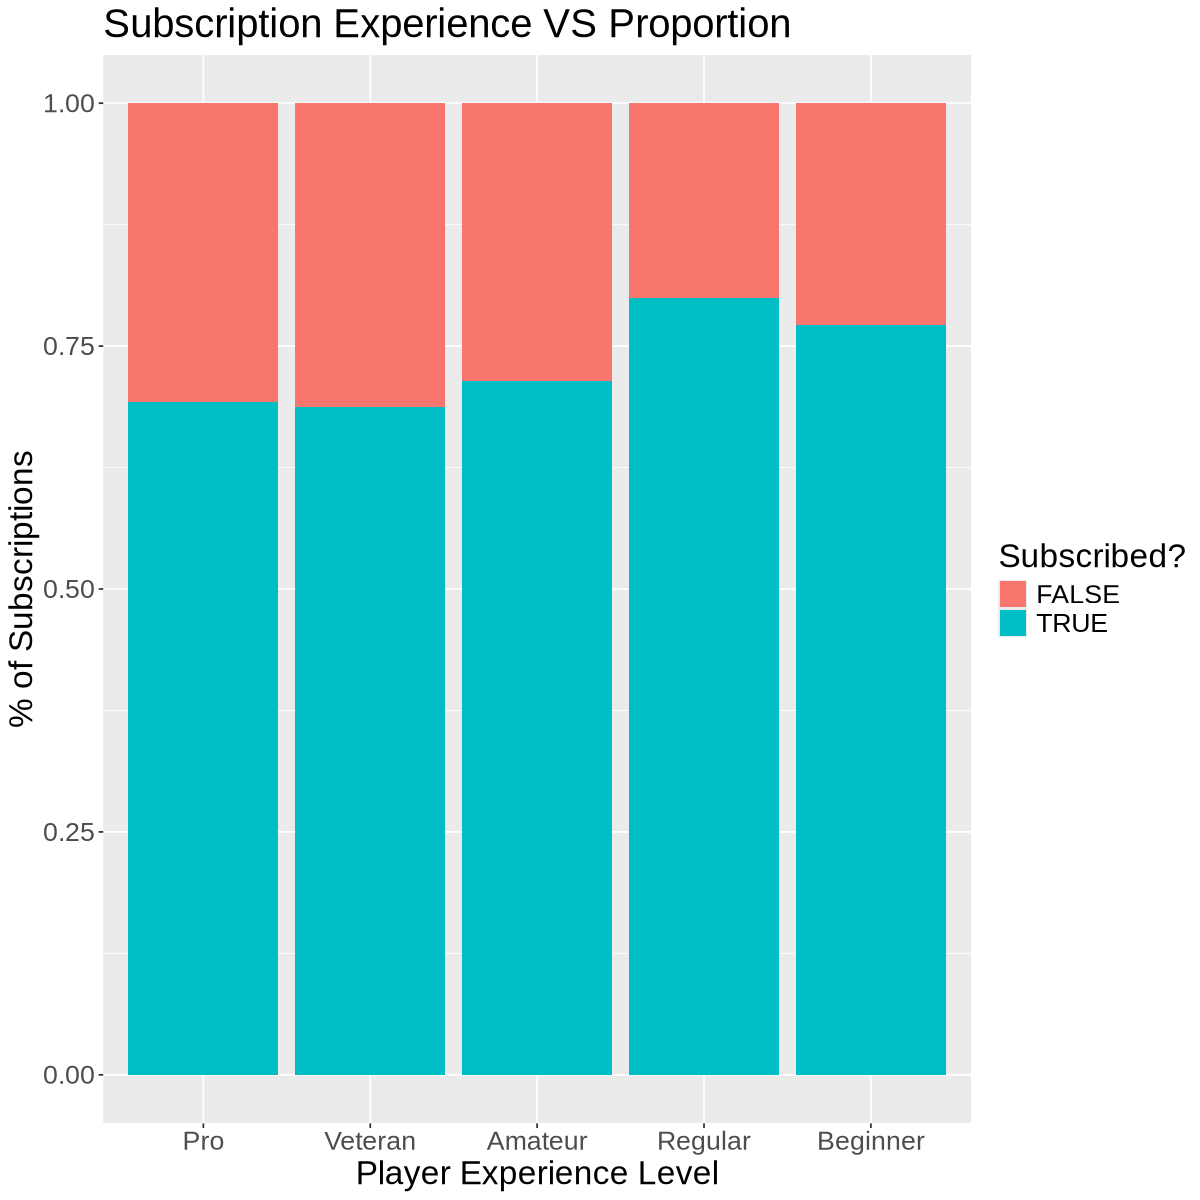

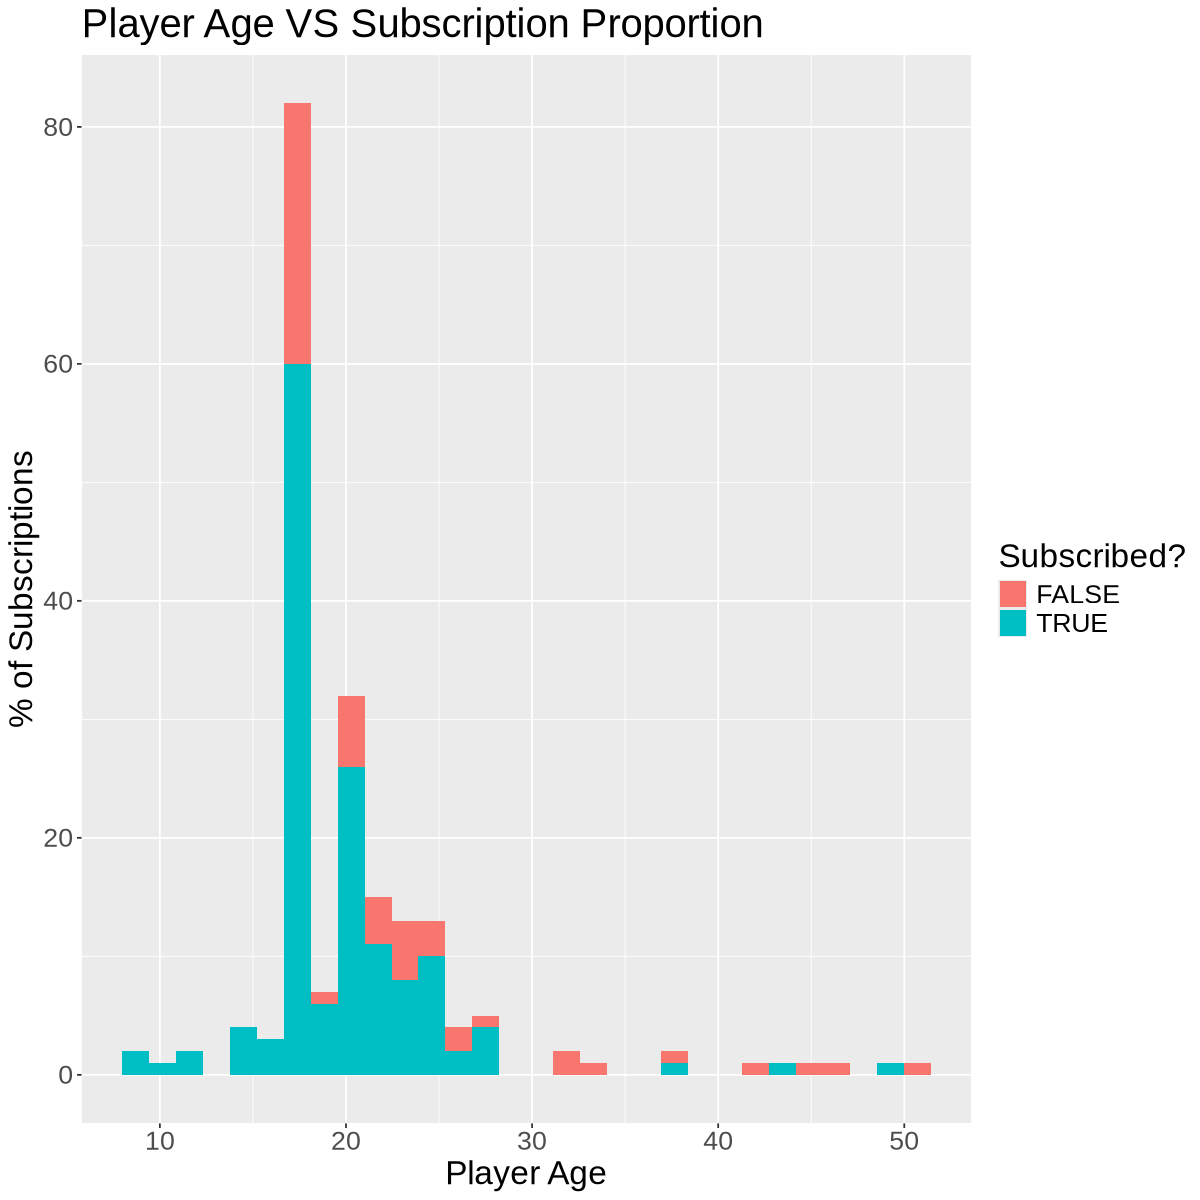

In [5]:
options (repr.plot.width = 10, repr.plot.height = 10)

experience_plot <- game_data |> ggplot (aes (x = experience, fill = subscribe)) +
    geom_bar (position = "fill") + 
    labs (x = "Player Experience Level", y = "% of Subscriptions", fill = "Subscribed?") +
    ggtitle ("Subscription Experience VS Proportion") +
    theme (text = element_text (size = 20))
experience_plot

age_plot <- game_data |> ggplot (aes (x = Age, fill = subscribe)) +
    geom_histogram () +
    labs (x = "Player Age", y = "% of Subscriptions", fill = "Subscribed?") +
    ggtitle ("Player Age VS Subscription Proportion") +
    theme (text = element_text (size = 20))
age_plot


As the played hours variable is mainly concentrated under 10 hours (i.e. not standardized), the subscription range can be separated into two graphs: 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 13 rows containing non-finite outside the scale range (`stat_bin()`).”
Warning message:
“Removed 4 rows containing missing values or values outside the scale range
(`geom_bar()`).”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 183 rows containing non-finite outside the scale range (`stat_bin()`).”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_bar()`).”


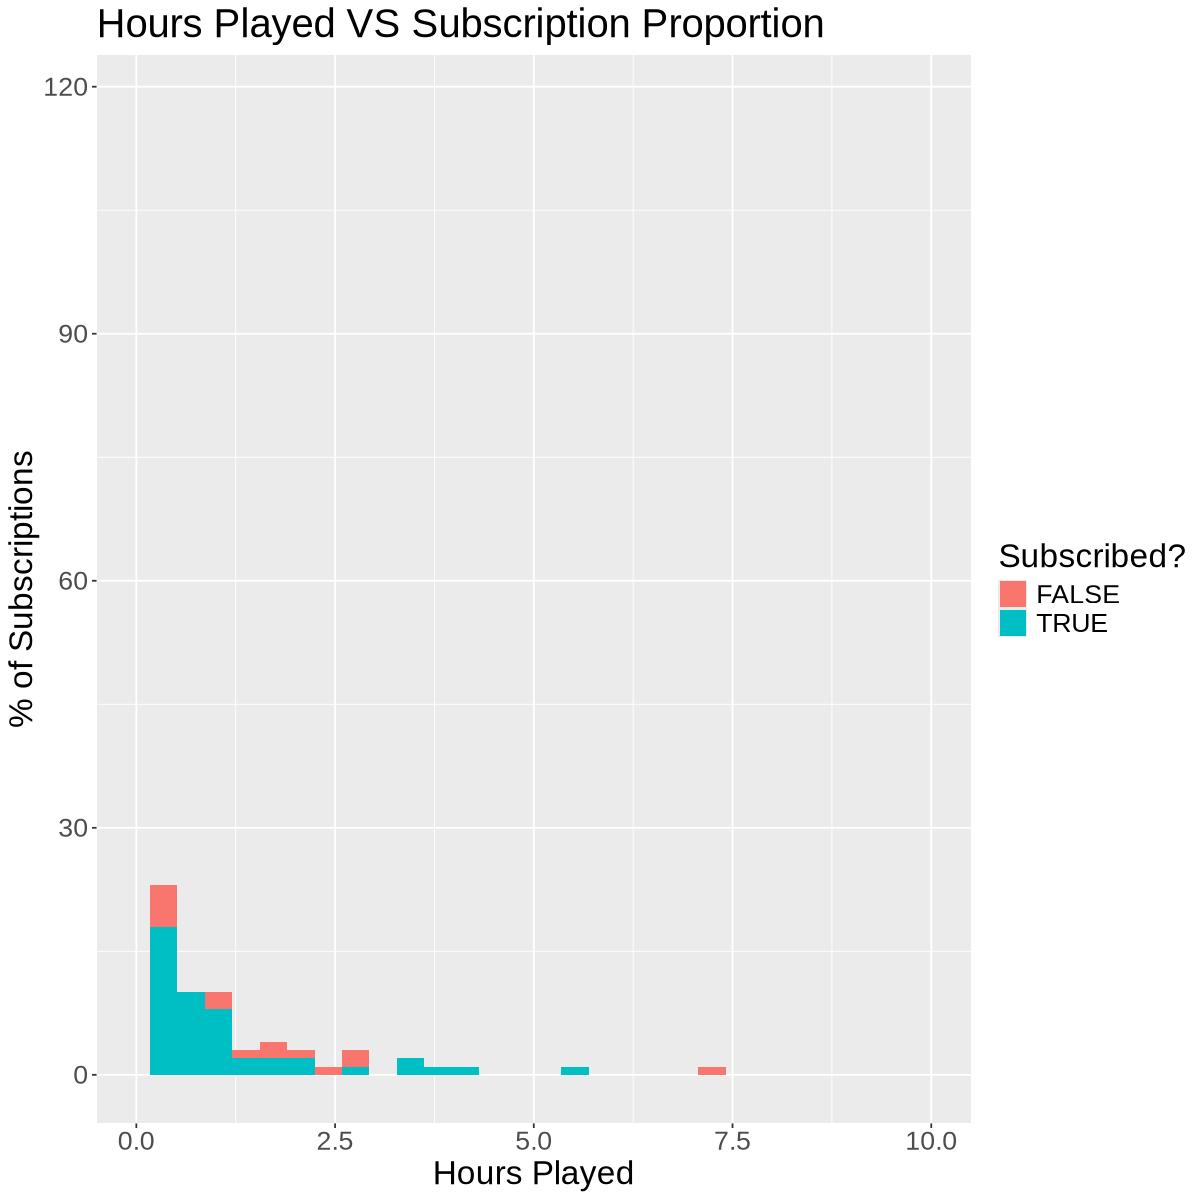

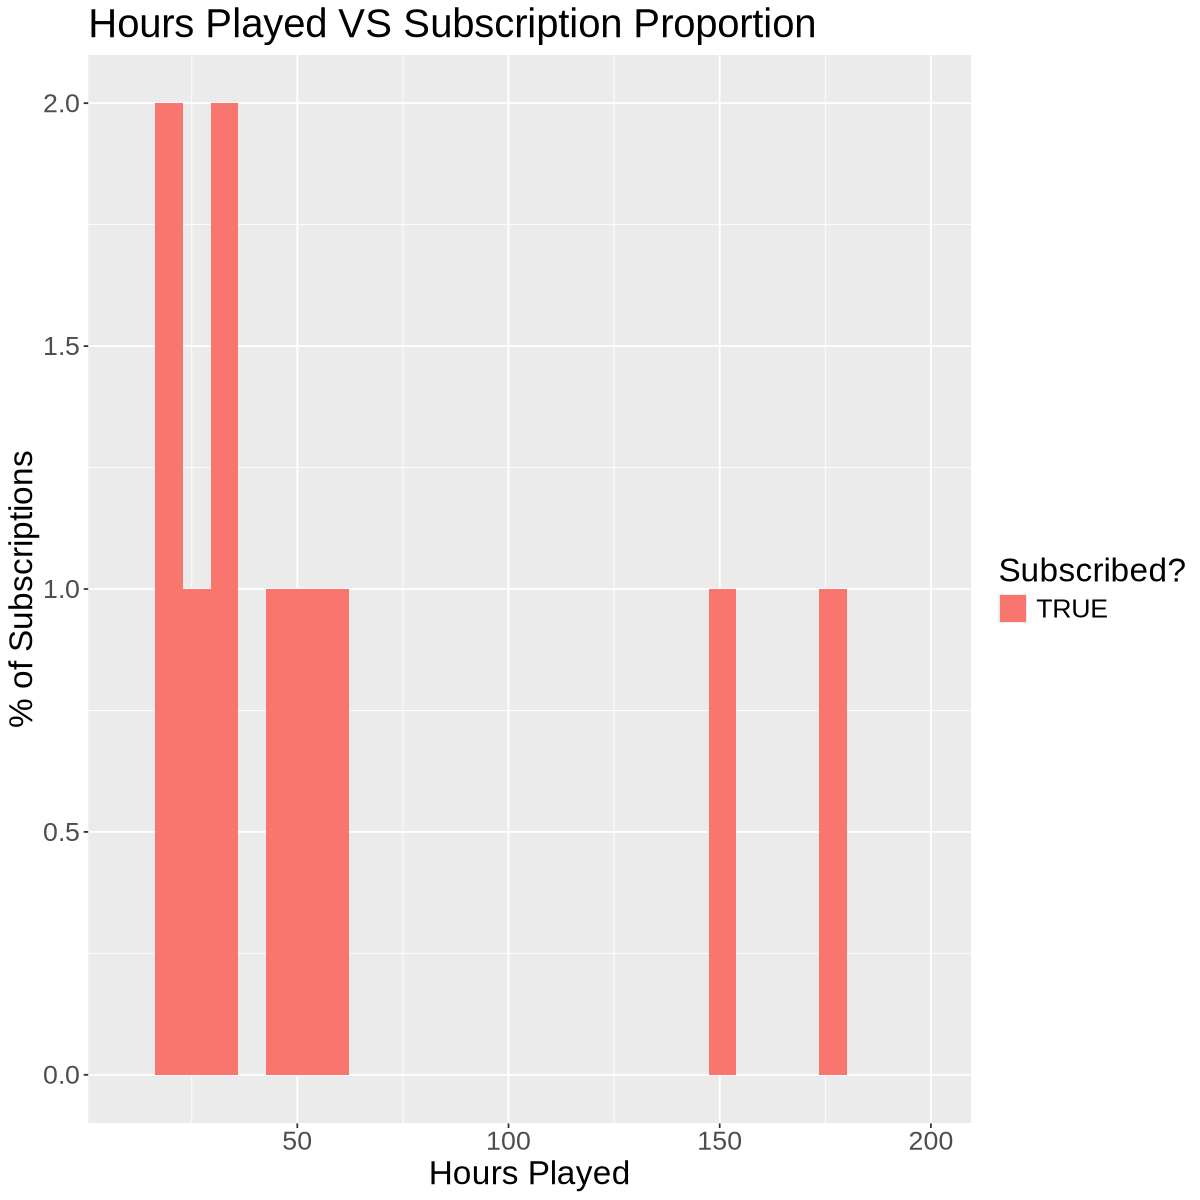

In [6]:
hours_plot_10 <- game_data |> ggplot (aes (x = played_hours, fill = subscribe)) +
    geom_histogram () +
    xlim (c (0, 10)) +
    labs (x = "Hours Played", y = "% of Subscriptions", fill = "Subscribed?") +
    ggtitle ("Hours Played VS Subscription Proportion") +
    theme (text = element_text (size = 20))
hours_plot_10

hours_plot_after_10 <- game_data |> ggplot (aes (x = played_hours, fill = subscribe)) +
    geom_histogram () +
    xlim (c (10, 200)) +
    labs (x = "Hours Played", y = "% of Subscriptions", fill = "Subscribed?") +
    ggtitle ("Hours Played VS Subscription Proportion") +
    theme (text = element_text (size = 20))
hours_plot_after_10


From the graphs above, we can ... *BKRAKLJLARJLKRAJ*

<font size="10"> Make some visualizations of the outcome variable: </font> 


What does the distribution of the variable look like?
What relationship does it have with some of the other variables?
Tip: Try using a range of box plots, scatterplots, bar charts, line graphs, etc.

From the given players.csv dataset, we know that only the `played_hours` and `Age` variables are qualitative, which is what we will be using in the recipes to determine if the player will have subscribed to the game-related newsletter going forward. However, as these variables fluctuate heavily in range, scaling is also necessary before we can determine the subscription classification.

In order to also implement the `experience` variable, we will have to correlate each of its factors (i.e. Amateur, Beginner, Regular, Pro, and Veteran) into a number. This can be done using the `as.numeric ()` function.  

The data will be split, with 75% going to the training data and 25% as testing data. This is done to ensure that the model can generalize and classify untrained data, allowing us to see its performance efficiency. A five-fold cross-validation (five validation sets) will also be utilized to ensure more training and testing sets using the same data, adding reliability to our graph/model. This will run through all k-neighbour values, and average the accuracy rate to figure out which is best suited for the dataset. Furthermore, a `set.seed(1234)` function will be utilized to ensure that the code will always return the same random samples. This number was chosen at random. 

Changing the experience variable into a number:

In [7]:
game_data <- mutate (game_data, number_experience = as.numeric (experience))
game_data

experience,subscribe,hashedEmail,played_hours,name,gender,Age,number_experience
<fct>,<fct>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,1
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17,2
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17,2
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Veteran,FALSE,71453e425f07d10da4fa2b349c83e73ccdf0fb3312f778b35c5802c3292c87bd,0.3,Pascal,Male,22,2
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17,3
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17,3


neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.6002791,5,0.02870265,Preprocessor1_Model01
2,accuracy,binary,0.6002791,5,0.02870265,Preprocessor1_Model02
3,accuracy,binary,0.6749754,5,0.02878736,Preprocessor1_Model03
⋮,⋮,⋮,⋮,⋮,⋮,⋮
13,accuracy,binary,0.7518555,5,0.01214101,Preprocessor1_Model13
14,accuracy,binary,0.7518555,5,0.01214101,Preprocessor1_Model14
15,accuracy,binary,0.7518555,5,0.01214101,Preprocessor1_Model15


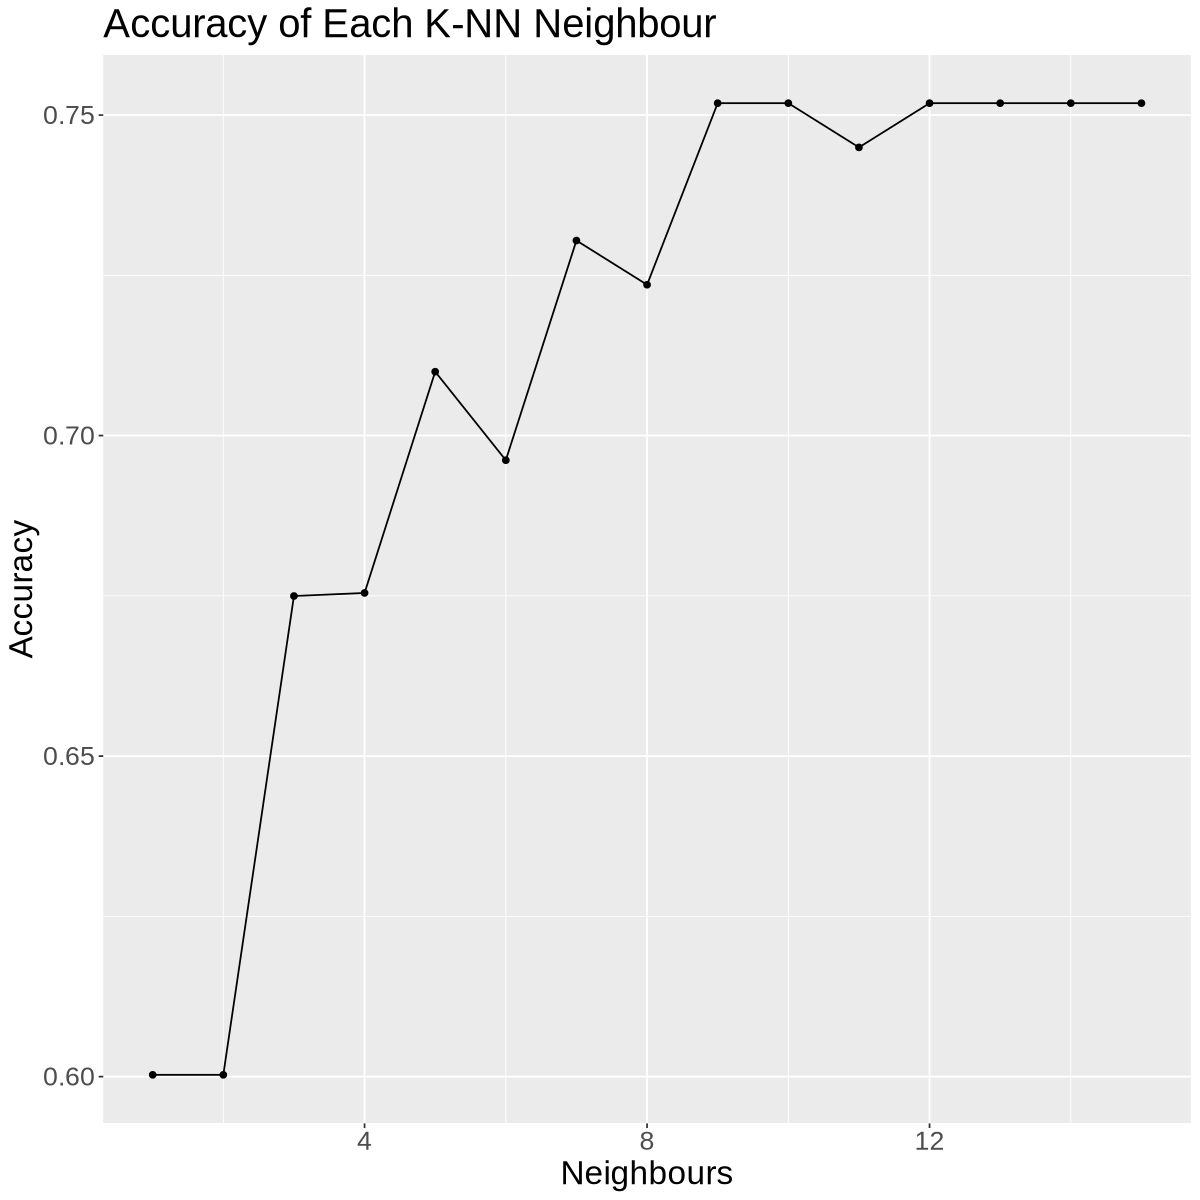

In [8]:
set.seed (1234)

## Splitting data into 75% training and 25% testing
game_split <- initial_split(game_data, prop = 0.75, strata = subscribe)  
game_train <- training(game_split)   
game_test <- testing(game_split)

## Game recipe
game_recipe <- recipe(subscribe ~ played_hours + Age + number_experience, data = game_train) |>
    step_scale (all_predictors ()) |>
    step_scale (all_predictors ())

## Using spec with tuning k-neighbour 
game_spec <- nearest_neighbor (weight_func = "rectangular", neighbors = tune ()) |>
    set_engine ("kknn") |>
    set_mode ("classification")

## Cross validation (5-fold)
game_vfold <- vfold_cv(game_train, v = 5, strata = subscribe)
k_vals <- tibble (neighbors = seq (from = 1, to = 15, by = 1))

game_fit <- workflow () |>
    add_recipe (game_recipe) |>
    add_model (game_spec) |>
    tune_grid (resamples = game_vfold, grid = k_vals) 

##  Game metrics for accuracy
game_metrics <- game_fit |>
    collect_metrics () |>
    filter(.metric == "accuracy") |> 
    mutate(neighbors = as.double(neighbors))
game_metrics

## Plot
cross_val_plot <- ggplot (game_metrics, aes (x = neighbors, y = mean)) +
    geom_point () +
    geom_line () +
    labs (x = "Neighbours", y = "Accuracy") + 
    ggtitle ("Accuracy of Each K-NN Neighbour") +
    theme (text = element_text (size = 20))
cross_val_plot


We can also find the best k-neighbour by filtering out for the neighbour with highest mean like so:

In [9]:
# Best K-Neighbour
best_k <- game_metrics |>
    arrange (desc (mean)) |>
    head (1) |>
    pull (neighbors)
best_k

[1] 9

From the graph and calculations for the best K-neighbour above, we can conclude that K = 9 has the highest accuracy. Adding this to our spec and adding it to our final fitted model:

In [11]:
## Using spec with the k-neighbour with the highest accuracy
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = best_k) |> 
      set_engine("kknn") |>
      set_mode("classification")

## Fitted model
minecraft_fit <- workflow() |>
         add_recipe (game_recipe) |>
         add_model  (knn_spec) |>
         fit(data = game_train)


Finding the accuracy and confusion matrix to our model:

In [12]:
set.seed(1234) 

## Prediction with testing data
minecraft_predictions <- predict(minecraft_fit, game_test) |>
    bind_cols(game_test)

## To find accuracy %
minecraft_metrics <- minecraft_predictions |>
    metrics(truth = subscribe, estimate = .pred_class) |>
    filter (.metric == "accuracy")
minecraft_metrics

## Confusion matrix for algorithm
minecraft_conf_mat <- minecraft_predictions |> 
     conf_mat(truth = subscribe, estimate = .pred_class)  
minecraft_conf_mat

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.6938776


          Truth
Prediction FALSE TRUE
     FALSE     0    2
     TRUE     13   34

<font size="6"> Discussion </font> 

- summarize what you found
- discuss whether this is what you expected to find?
- discuss what impact could such findings have?
- discuss what future questions could this lead to?


From the above results, the accuracy for our classifier is found to be 69.39%. We can also find the precision and recall using the confusion matrix above with the equations:
- Precision = # of correct positive predictions/ total # of positive predictions
- Recall = # of correct positive predictions/ total # of positive test set observations

Therefore, the precision for this model would be 35/48 (72.92%) and recall 35/36 (97.22%). [why do we need to find this]


